<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/PP_M4_Company_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Company Bankruptcy Prediction (Kaggle)

### Author: Pankaj Pant











# Project Details

Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  


**Requirements**

- Split the training set into an 80% training and 20% validation set and conduct / improve upon previous EDA. 
- Build at least three models: an SVM, a logistic regression model, a Naïve Bayes model. Evaluate each of the models’ assumptions. 
- Conduct hyperparameter tuning for the SVM kernel. 
- Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets. 
- Build ROC and Precision / Recall graphs. Evaluate your models' performance on the validation set using the F1-score.  

Python scikit-learn should be your primary environment for conducting this research.









#Importing Packages

In [150]:
#!pip install pwlf
!pip install sklearn.utils.testing

ERROR: Could not find a version that satisfies the requirement sklearn.utils.testing (from versions: none)
ERROR: No matching distribution found for sklearn.utils.testing


In [151]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import pwlf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC





%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [3]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#cd nbconvert

In [5]:
#!pip install -e .

In [6]:
#!apt-get install pandoc


In [7]:
#!apt-get update
#!apt-get install inkscape
#!add-apt-repository universe
#!add-apt-repository ppa:inkscape.dev/stable
#!apt-get update
#!apt install inkscape

# Ingestion
### Connect to google drive and import training and test data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W4"

total 14809
-rw------- 1 root root 11456101 Feb 14  2021  Company_Bankruptcy_Prediction.csv
-rw------- 1 root root      143 Feb  1 06:42 'M4_A1_Company Bankruptcy Prediction.gdoc'
-rw------- 1 root root   102333 Feb  2 08:30 'PP_M4_Company Bankruptcy Prediction.ipynb'
-rw------- 1 root root  3604512 Feb  1 02:07  Rough_M4_House_Prices_Advance_Regression_Techniques.ipynb


In [10]:
#Generalize the file path 
w4_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W4"

In [11]:
#Create dataframe
comp_df = pd.read_csv(w4_files+"/Company_Bankruptcy_Prediction.csv")
comp_df.shape



(6819, 96)

In [12]:
# Train Test split

train_df, test_df = train_test_split(comp_df, test_size=0.2)

In [13]:
# EDA Step1: Analyze shape, info and describe the dataset and check for NULLs
print('shape:---',train_df.shape)
#print('\n\n',train_df.info())

print('shape:---',test_df.shape)
##print('\n\n',test_df.info())

shape:--- (5455, 96)
shape:--- (1364, 96)


Training dataset has 5455 rows and 96 columns while test data has 1364 records and 96 columns.

In [14]:
# describe

train_df.describe()

print('\n********Describe both numerical and non-numeric (categorical) variables********\n')

train_df.describe(include = "all")

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.0,5455.000000
mean,0.032814,0.505332,0.558800,0.553664,0.607883,0.607864,0.998886,0.797269,0.809144,0.303488,0.781463,1.985032e+09,1.935137e+09,0.467480,1.675234e+07,0.11


********Describe both numerical and non-numeric (categorical) variables********



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5.455000e+03,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5.455000e+03,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.0,5455.000000
mean,0.032814,0.505332,0.558800,0.553664,0.607883,0.607864,0.998886,0.797269,0.809144,0.303488,0.781463,1.985032e+09,1.935137e+09,0.467480,1.675234e+07,0.11

In [15]:
#finding fields with NULL values

train_df.isnull().sum().sum()
#print('\n\n',train_df.info())

0

In [16]:
data_type = pd.concat([train_df.dtypes], axis=1, keys=['DType'])

catg_var = data_type[(data_type.DType == "object")]
catg_var.count()
num_var = data_type[(data_type.DType != "object")]
num_var.count()

DType    0
dtype: int64

DType    96
dtype: int64

In [17]:
#NA values
train_df.isna().sum().sum()


0

In [18]:
# Identify categorical and numerical variables using Dtype column from .info() output

non_object = train_df.dtypes[train_df.dtypes != "object"].index
#print("Number of Numerical features: ", len(non_object))

objects = train_df.dtypes[train_df.dtypes == "object"].index
#print("Number of Cateforical features: ", len(objects))



num_fields = []
cat_fields = []


for i in range(len(non_object)):
  num_fields.append(non_object[i])

for i in range(len(objects)):
  cat_fields.append(objects[i])



print('\n')
print("Number of Numerical features: ",len(num_fields))
print('\n')
print("Number of Categorical features: ",len(cat_fields))




Number of Numerical features:  96


Number of Categorical features:  0


# **EDA**
<font color='lightblue'>We will apply a few EDA techniques:


1.   “Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.”
https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/
2.   Data Visualization



</font>

### <font color='lightblue'></font>

In [19]:
data = []
for i in num_fields:
  data.append([i, round(train_df[i].skew(),2), round(train_df[i].kurt(),2)])

df_sk = pd.DataFrame(data, columns=['Num_Field','Skewness','Kurtosis'])
df_sk.sort_values(by= ['Skewness'],ascending=False)

,Num_Field,Skewness,Kurtosis
76,Fixed Assets to Assets,73.86,5455.00
33,Current Ratio,73.86,5455.00
69,Total income/Total expense,73.69,5437.94
41,Contingent liabilities/Net worth,71.87,5255.16
30,Net Value Growth Rate,71.81,5235.71
24,Realized Sales Gross Profit Growth Rate,71.63,5230.78
28,Continuous Net Profit Growth Rate,63.00,4577.34
31,Total Asset Return Growth Rate Ratio,56.55,4125.81
51,Revenue per person,53.16,2856.24
92,Degree of Financial Leverage (DFL),46.30,2482.51


For skewness, if the value is greater than + 1.0, the distribution is right skewed. If the value is less than -1.0, the distribution is left skewed. For kurtosis, if the value is greater than + 1.0, the distribution is leptokurtik. If the value is less than -1.0, the distribution is platykurtik.

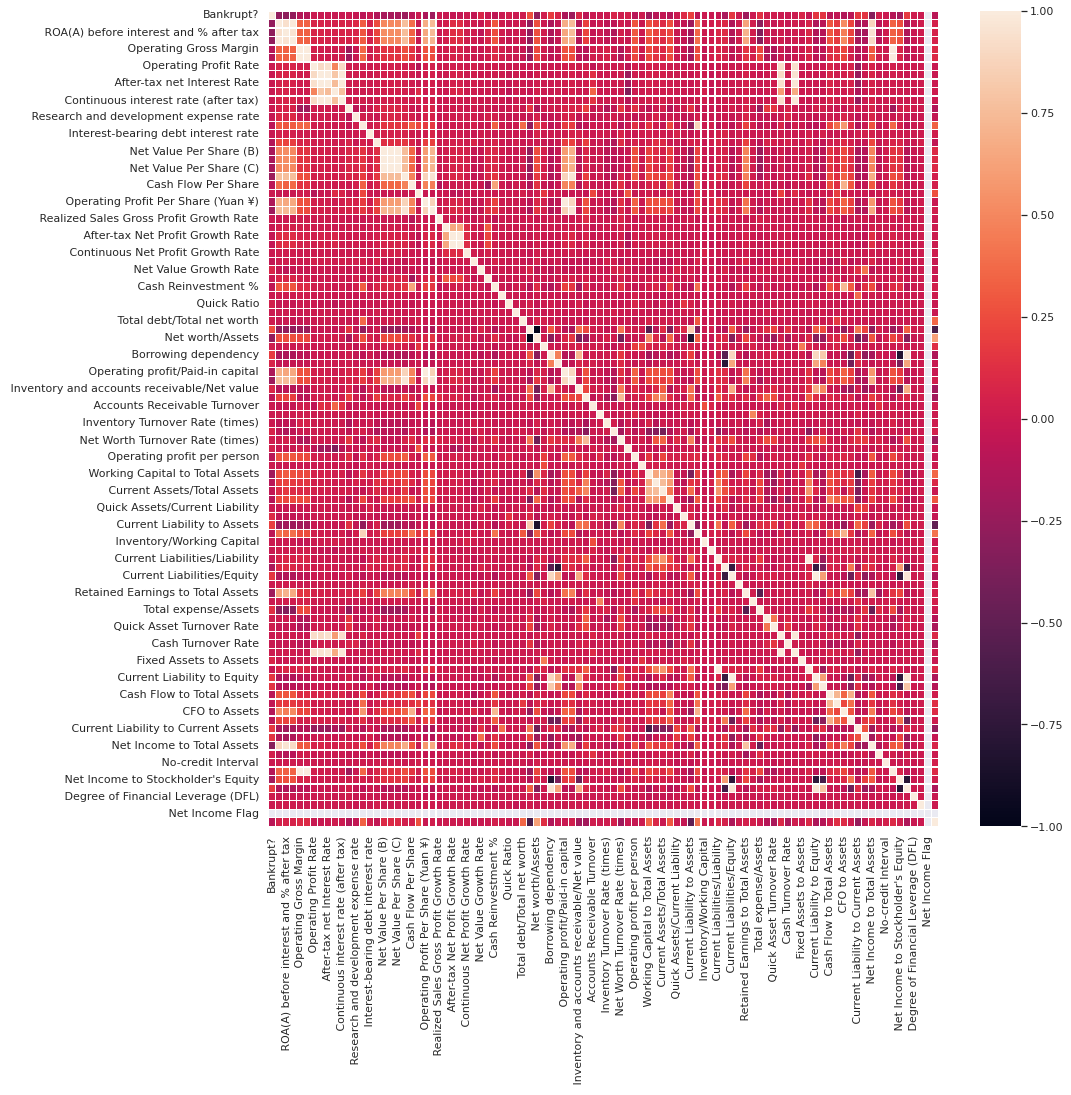

In [20]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, linewidth = 0.1)

Bankrupt?
0    5276
1     179
Name: Bankrupt?, dtype: int64

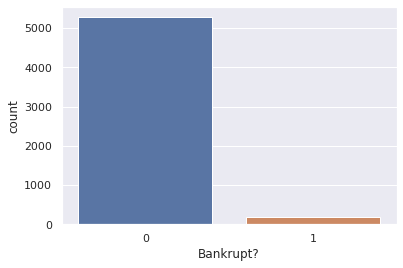

In [21]:
train_df.groupby("Bankrupt?")["Bankrupt?"].count()


sns.countplot(x = 'Bankrupt?', data = train_df)

In [22]:
print('duplicates',train_df.duplicated().sum())


duplicates 0


In [23]:
# The data is skewed

print(train_df['Bankrupt?'].value_counts())


print('No Bankruptcy: ', round(train_df['Bankrupt?'].value_counts()[0]/len(train_df) * 100,2), '%')
print('Bankruptcy: ', round(train_df['Bankrupt?'].value_counts()[1]/len(train_df) * 100,2), '%')

0    5276
1     179
Name: Bankrupt?, dtype: int64
No Bankruptcy:  96.72 %
Bankruptcy:  3.28 %


Text(0.5, 1.0, 'Bankrupt vs Net Income to Total Assets')

Text(0.5, 1.0, 'Bankrupt vs Tot Debt/Net worth Correlation')

Text(0.5, 1.0, 'Bankrupt vs Current Asset Turnover Rate')

Text(0.5, 1.0, 'Bankrupt vs Net Worth/Assets Correlation')

Text(0.5, 1.0, 'Bankrupt vs  working capital to total assets')

Text(0.5, 1.0, 'Bankrupt vs cash / total assets')

Text(0.5, 1.0, 'Bankrupt vs current liability to assets')

Text(0.5, 1.0, 'Bankrupt vs  Retained Earnings to Total Assets')

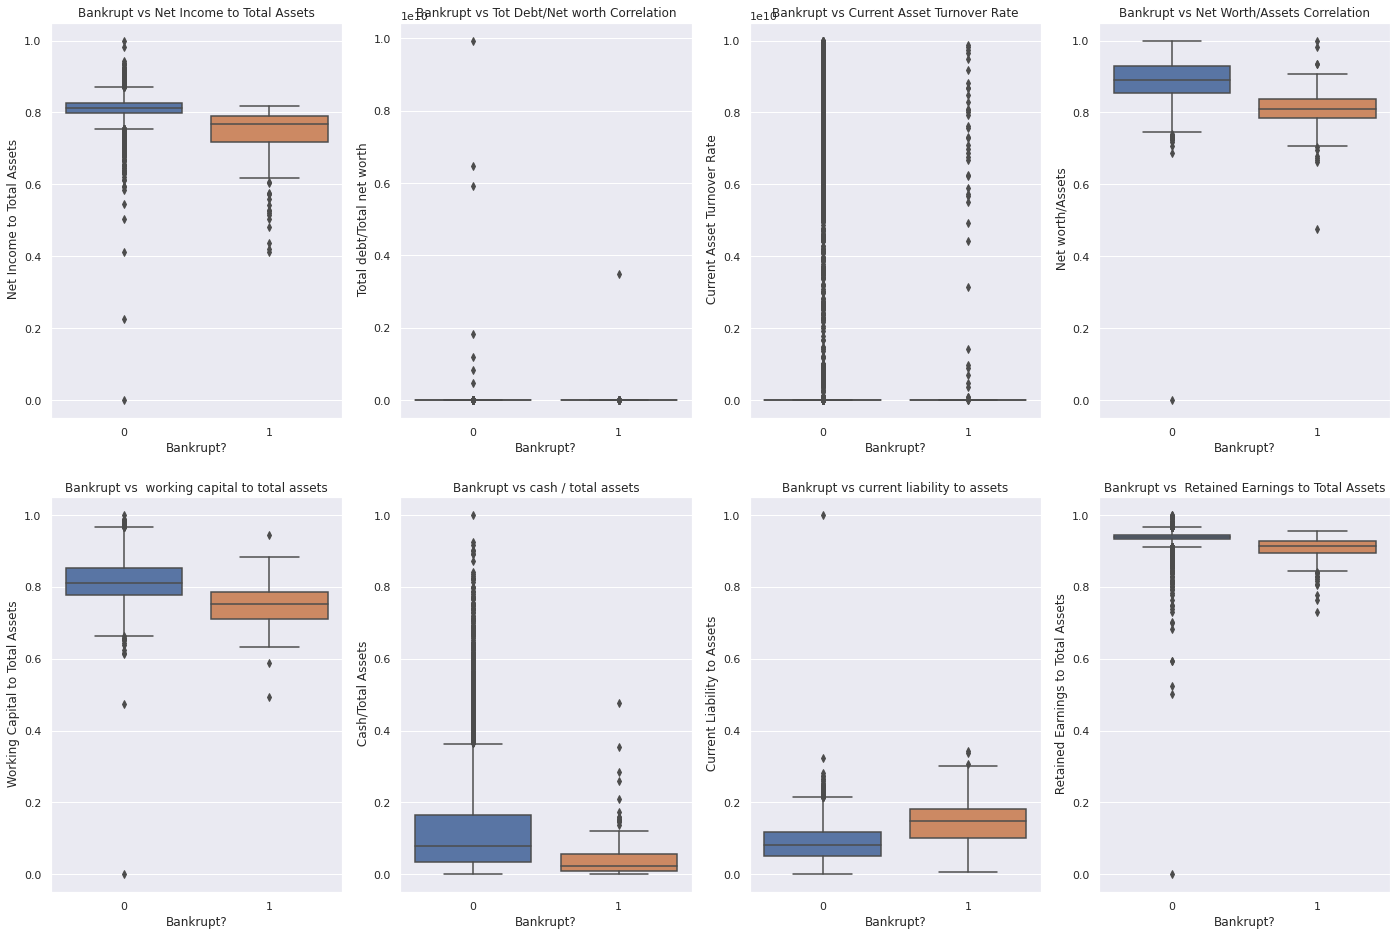

In [24]:
# Plot and analyze a few of the features

# Plotting interesting features

f, axes = plt.subplots(nrows = 2, ncols=4, figsize=(24,16))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=train_df, ax=axes[0,0])
axes[0,0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=train_df, ax=axes[0,1]) 
axes[0,1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Current Asset Turnover Rate", data=train_df, ax=axes[0,2])
axes[0,2].set_title('Bankrupt vs Current Asset Turnover Rate')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=train_df, ax=axes[0,3])  
axes[0,3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=train_df, ax=axes[1,0])
axes[1,0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=train_df, ax=axes[1,1])
axes[1,1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=train_df, ax=axes[1,2])
axes[1,2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=train_df, ax=axes[1,3])
axes[1,3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

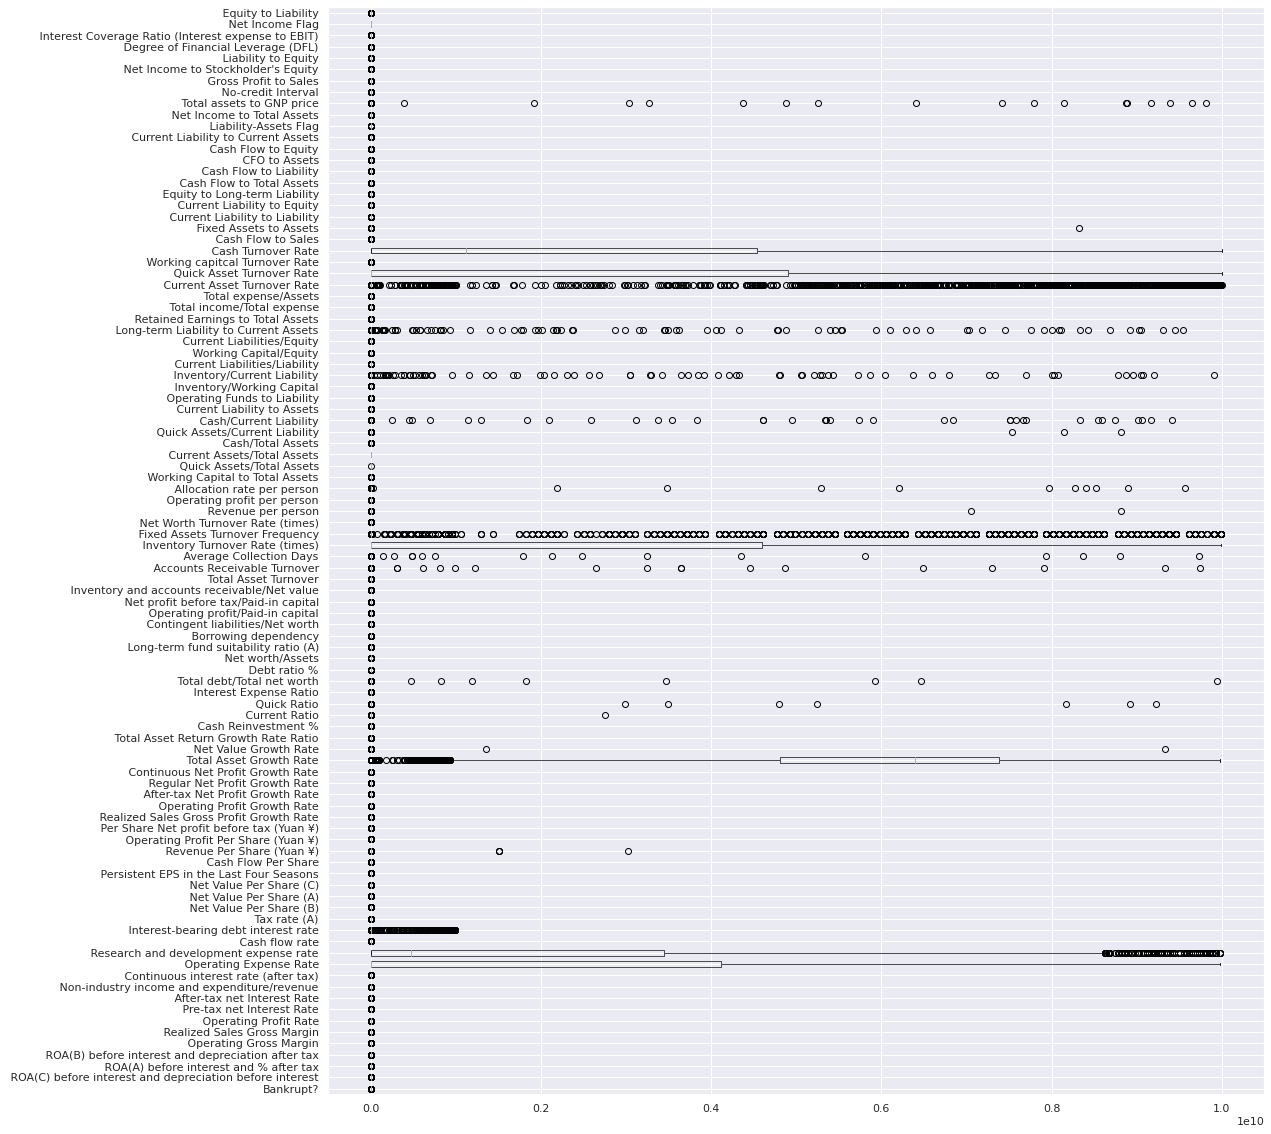

In [25]:
# Understanding Outliers

train_df.boxplot(vert=False,figsize= (20,20))
plt.subplots_adjust(left=0.25)
plt.show()

In [26]:
corr = train_df[num_fields].corr()
corrl = corr.nlargest(len(num_fields), 'Bankrupt?')['Bankrupt?']

corrl

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.261986
 Current Liability to Assets                                0.198126
 Borrowing dependency                                       0.181135
 Liability to Equity                                        0.172155
 Current Liability to Current Assets                        0.164942
 Current Liability to Equity                                0.159368
 Current Liabilities/Equity                                 0.159368
 Liability-Assets Flag                                      0.154282
 Equity to Long-term Liability                              0.144359
 Total expense/Assets                                       0.128224
 Cash/Current Liability                                     0.105565
 Inventory and accounts receivable/Net value                0.078479
 Contingent liabilities/Net worth                           0.077881
 Fixed Assets to Assets           

In [27]:
# Find variables with correlation > .50

corr = train_df.corr()
corrl = corr.nlargest(len(num_fields), 'Bankrupt?')['Bankrupt?']
corr_cols = corr.abs().nlargest(20,'Bankrupt?')['Bankrupt?'].index

#corr_pos.remove('Bankrupt?')

print(corr_cols)




Index(['Bankrupt?', ' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Net worth/Assets', ' Debt ratio %', ' ROA(C) before interest and depreciation before interest', ' Persistent EPS in the Last Four Seasons', ' Net profit before tax/Paid-in capital', ' Retained Earnings to Total Assets', ' Per Share Net profit before tax (Yuan ¥)', ' Current Liability to Assets', ' Working Capital to Total Assets', ' Net Income to Stockholder's Equity', ' Borrowing dependency', ' Liability to Equity', ' Net Value Per Share (A)', ' Net Value Per Share (B)', ' Net Value Per Share (C)', ' Current Liability to Current Assets'], dtype='object')


In [28]:
def display_stat(col, df):
  num_cols = col
  train = df
  for i in range(len(col)):
    mean = train[num_cols[i]].mean()
    std = train[num_cols[i]].std()
    skew = train[num_cols[i]].skew()
    kurtosis = train[num_cols[i]].kurtosis()
    print(num_cols[i]+':')
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [29]:
display_stat(corr_cols, train_df)

Bankrupt?:
mean: 0.0328, std: 0.1782, skew: 5.2463, kurtosis: 25.5333 
 Net Income to Total Assets:
mean: 0.8078, std: 0.0407, skew: -3.9036, kurtosis: 48.6360 
 ROA(A) before interest and % after tax:
mean: 0.5588, std: 0.0654, skew: -0.9825, kurtosis: 8.3700 
 ROA(B) before interest and depreciation after tax:
mean: 0.5537, std: 0.0618, skew: -0.7143, kurtosis: 7.8307 
 Net worth/Assets:
mean: 0.8867, std: 0.0544, skew: -1.1269, kurtosis: 12.9622 
 Debt ratio %:
mean: 0.1133, std: 0.0544, skew: 1.1269, kurtosis: 12.9622 
 ROA(C) before interest and depreciation before interest:
mean: 0.5053, std: 0.0610, skew: -0.2632, kurtosis: 6.3873 
 Persistent EPS in the Last Four Seasons:
mean: 0.2290, std: 0.0340, skew: 5.6296, kurtosis: 91.0894 
 Net profit before tax/Paid-in capital:
mean: 0.1828, std: 0.0313, skew: 6.9298, kurtosis: 136.2148 
 Retained Earnings to Total Assets:
mean: 0.9346, std: 0.0267, skew: -11.8021, kurtosis: 317.6895 
 Per Share Net profit before tax (Yuan ¥):
mean: 0.

##**MinMaxScaler**

Rescale the data so that all feature values are between 0 and 1. However, if there is an outlier, the transformed value may be compressed into a very narrow range.

In other words, MinMaxScaler is also very sensitive to the existence of outliers.

Text(0.5, 1.0, 'Orginal Bankrupt?')

Text(0.5, 1.0, 'Standard Scaling Bankrupt?')

Text(0.5, 1.0, 'Standard Scaling Bankrupt?')

((array([-3.65807505, -3.42410669, -3.29522314, ...,  3.29522314,
          3.42410669,  3.65807505]), array([0., 0., 0., ..., 1., 1., 1.])),
 (0.07328240089992785, 0.03281393217231897, 0.41109998339219145))

Text(0.5, 1.0, 'Orginal  ROA(C) before interest and depreciation before interest')

Text(0.5, 1.0, 'Standard Scaling  ROA(C) before interest and depreciation before interest')

Text(0.5, 1.0, 'Standard Scaling  ROA(C) before interest and depreciation before interest')

((array([-3.65807505, -3.42410669, -3.29522314, ...,  3.29522314,
          3.42410669,  3.65807505]),
  array([0.        , 0.06693316, 0.08141179, ..., 0.81801784, 0.97153025,
         1.        ])),
 (0.05901486014384621, 0.5053318673012482, 0.9667347922579785))

Text(0.5, 1.0, 'Orginal  ROA(A) before interest and % after tax')

Text(0.5, 1.0, 'Standard Scaling  ROA(A) before interest and % after tax')

Text(0.5, 1.0, 'Standard Scaling  ROA(A) before interest and % after tax')

((array([-3.65807505, -3.42410669, -3.29522314, ...,  3.29522314,
          3.42410669,  3.65807505]),
  array([0.        , 0.05061207, 0.06279848, ..., 0.94669814, 0.95421859,
         1.        ])),
 (0.06250883829259027, 0.5557240653176617, 0.9481484999312122))

Text(0.5, 1.0, 'Orginal  ROA(B) before interest and depreciation after tax')

Text(0.5, 1.0, 'Standard Scaling  ROA(B) before interest and depreciation after tax')

Text(0.5, 1.0, 'Standard Scaling  ROA(B) before interest and depreciation after tax')

((array([-3.65807505, -3.42410669, -3.29522314, ...,  3.29522314,
          3.42410669,  3.65807505]),
  array([0.        , 0.05482092, 0.08838803, ..., 0.86915788, 0.95776005,
         1.        ])),
 (0.05921288872732133, 0.5536642241106673, 0.9577647537415352))

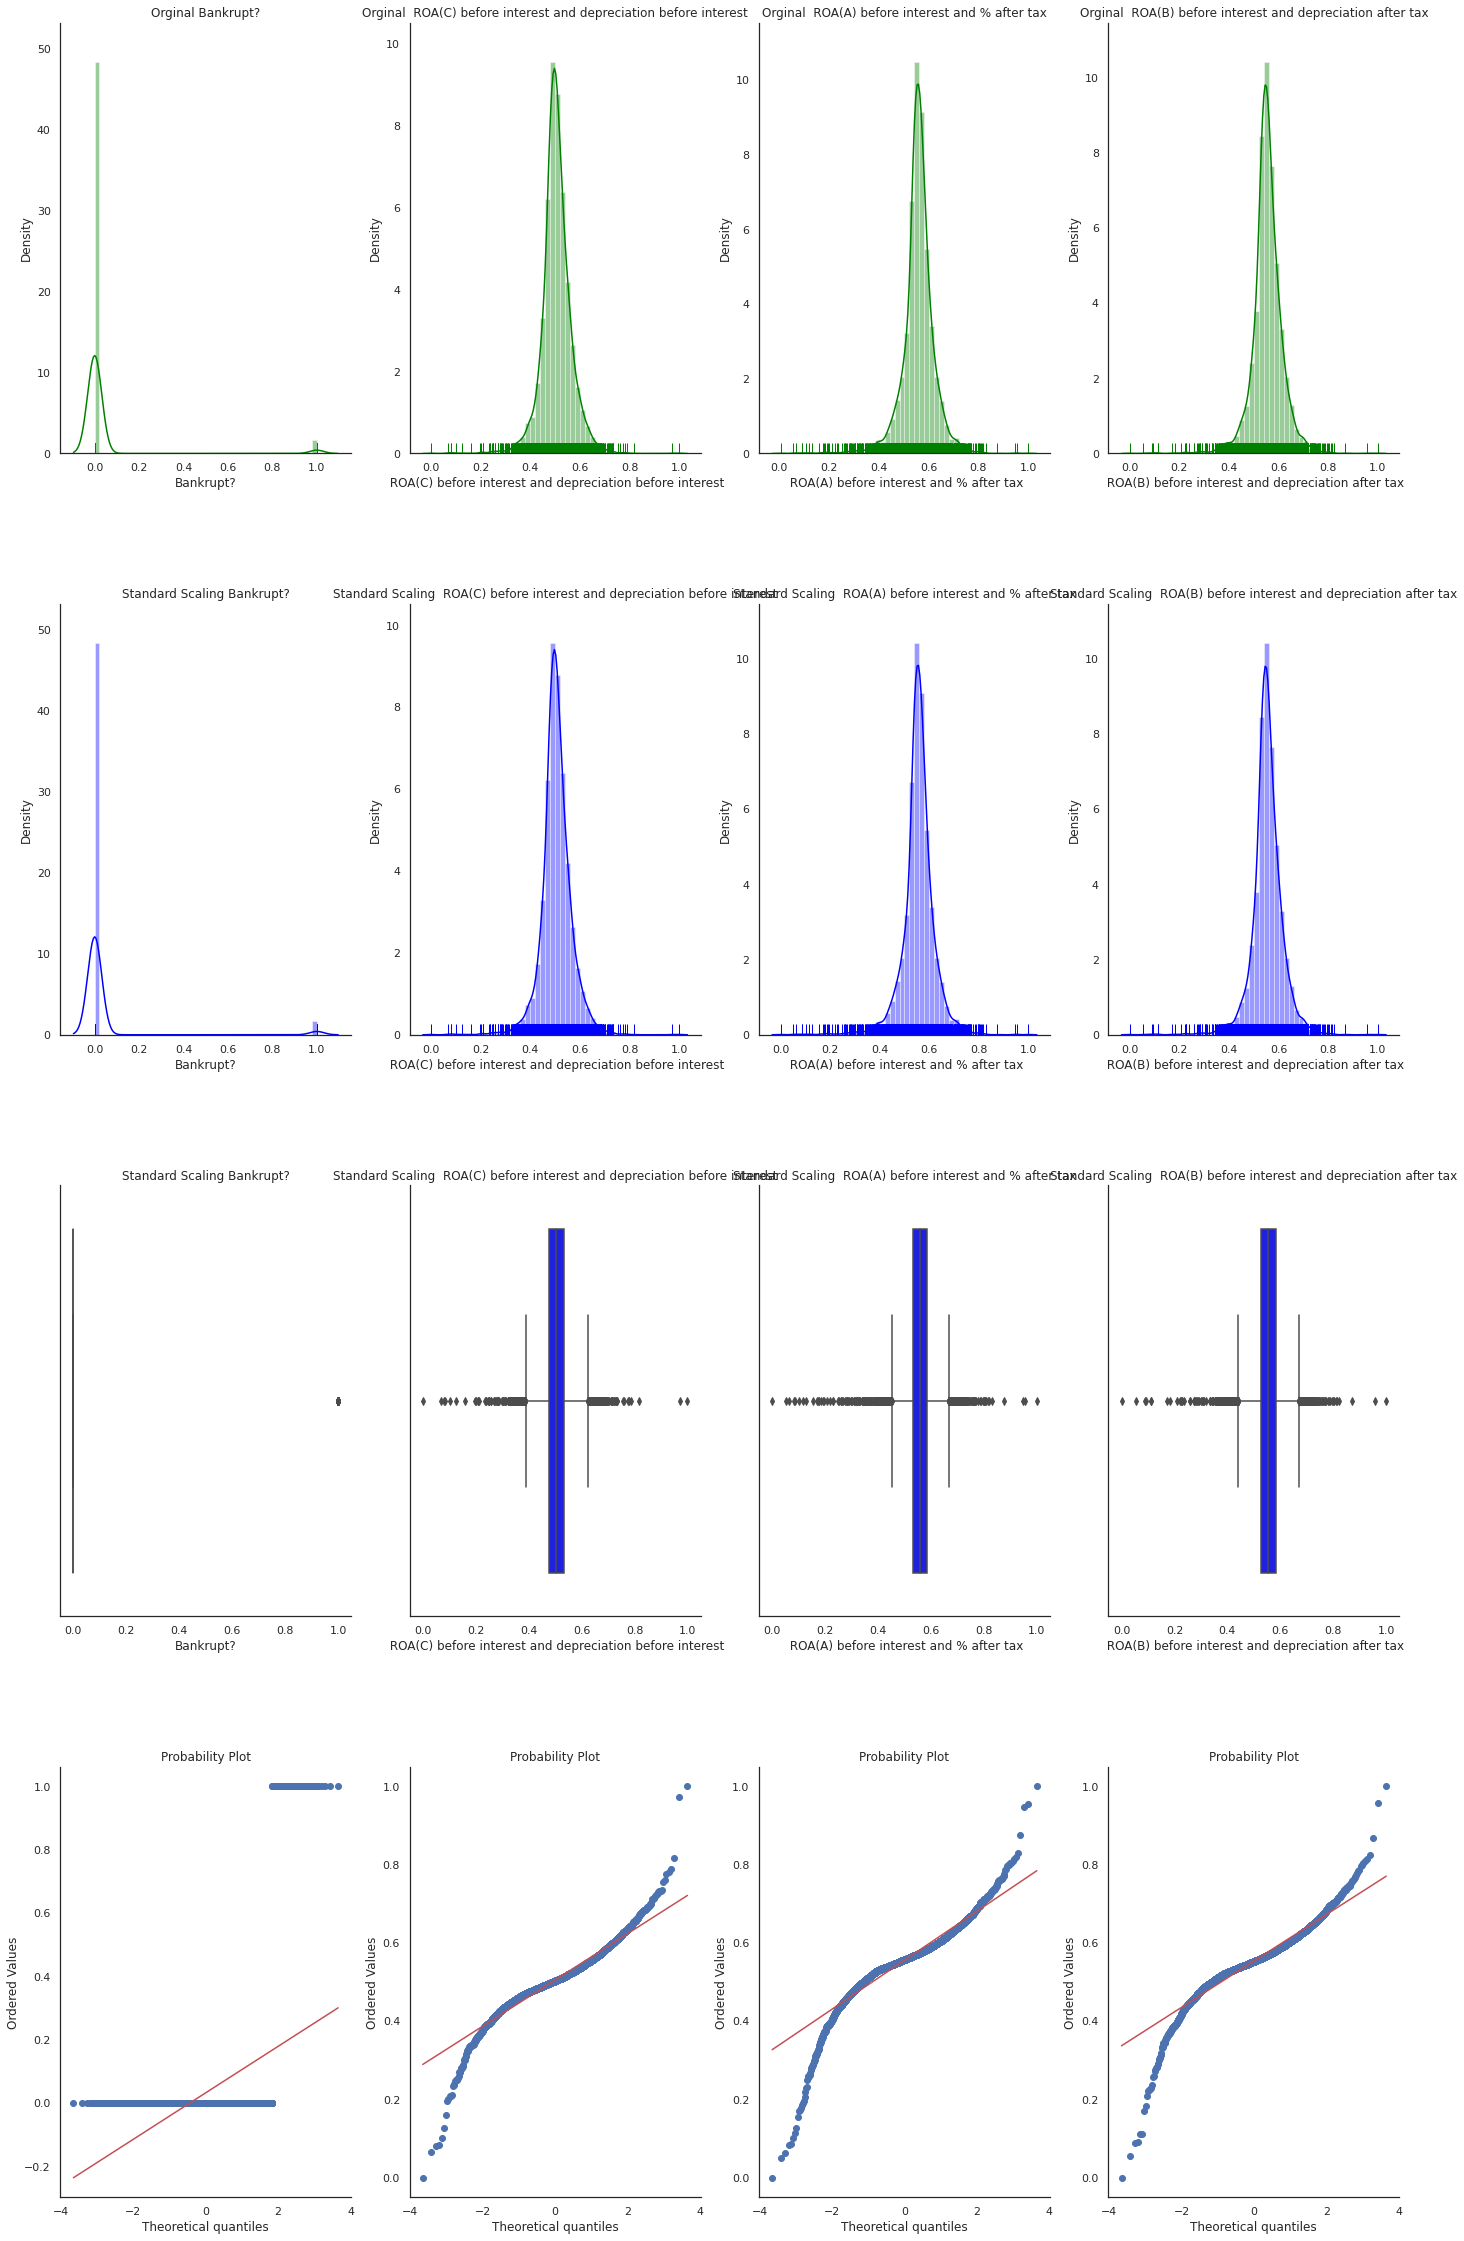

In [31]:
from sklearn.preprocessing import MinMaxScaler
train_y = train_df.copy()
rcParams['figure.figsize'] = 24,40
fig, axes = plt.subplots(4, 4)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

scaler = MinMaxScaler()
for i in range(4):
  num_cols = num_fields
  train_y.loc[:,num_cols[i]] = scaler.fit_transform(train_y[[num_cols[i]]])
  sns.distplot(train_df.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
  axes[0,i].set_title('Orginal '+num_cols[i],fontsize=12)
  sns.distplot(train_y.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
  axes[1,i].set_title('MinMax Scaling '+num_cols[i],fontsize=12)
  sns.boxplot(train_y.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
  axes[2,i].set_title('MinMax Scaling '+num_cols[i],fontsize=12)
  stats.probplot(train_y[num_cols[i]],plot = axes[3,i])
  sns.despine()

MinMaxScaler observations:
*   Due to impabalnce in the data, scaling wont't make a difference



## Multicollinearity

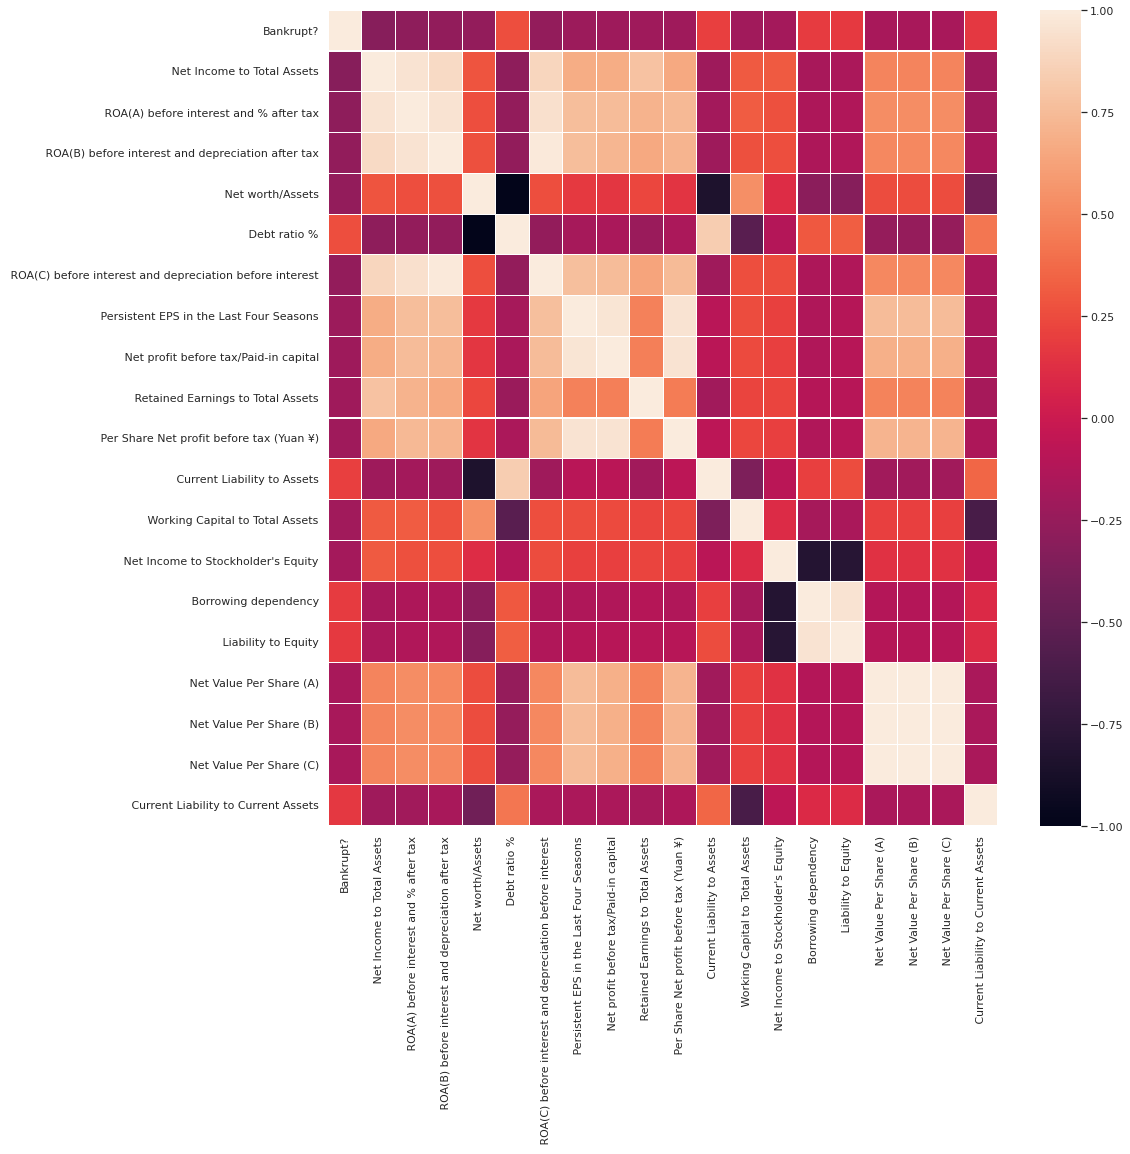

In [32]:
corr = train_df[corr_cols].corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, linewidth = 0.1)

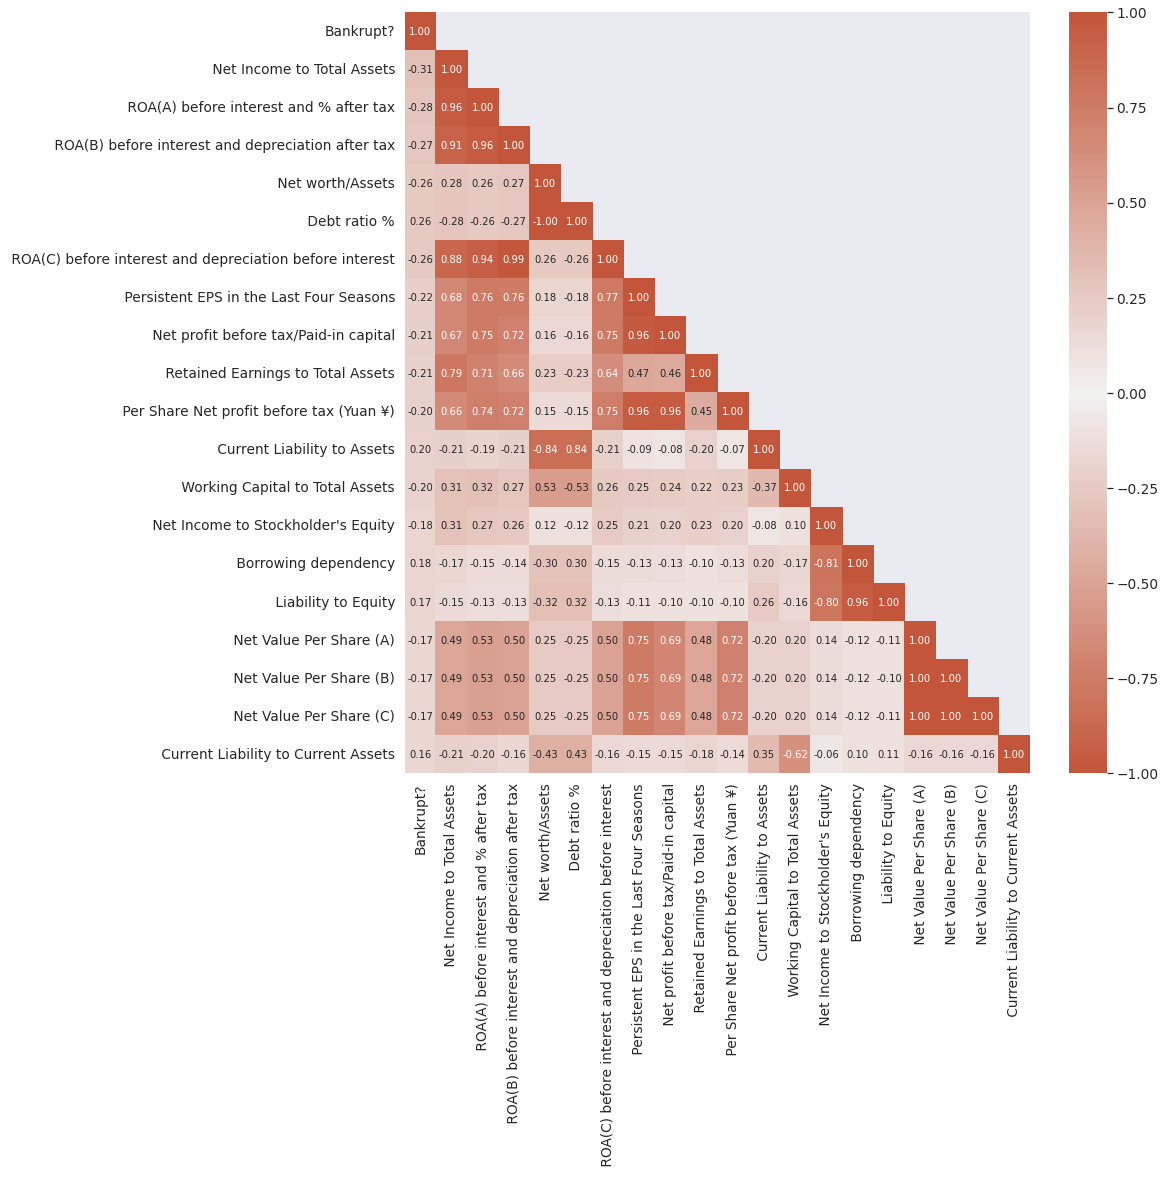

In [33]:
cm = train_df[corr_cols].corr()
#lower trainglular part of the correlation matrix
lt_cm = cm.where(np.tril(np.ones(cm.shape)).astype(np.bool))

sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(14,14))   
cmap = sns.diverging_palette(20, 20, as_cmap=True)

heatmap = sns.heatmap(lt_cm, cbar=True, annot=True, cmap=cmap, fmt='.2f',annot_kws={'size': 10})

As observed from the heatmap, there are features that shows high colinearity. For example - Borrowing dependency has highly correlated with Liability to Equity, Current Liabilitie/Equity and Current Liability to Equity.

For modeling we will remove a few of these variables.

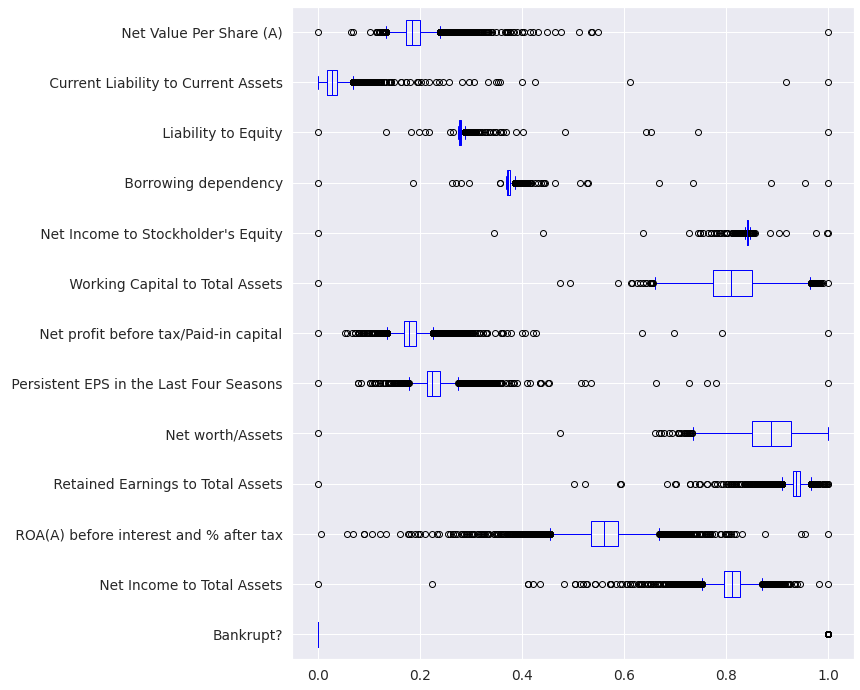

In [34]:
final_col_list = ['Bankrupt?', ' Net Income to Total Assets',' ROA(A) before interest and % after tax',
                  ' Retained Earnings to Total Assets', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons',
                  ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', " Net Income to Stockholder's Equity",
                  ' Borrowing dependency', ' Liability to Equity', ' Current Liability to Current Assets', ' Net Value Per Share (A)']

train_df[final_col_list].boxplot(vert=False,figsize= (12,12), color = 'blue')
plt.subplots_adjust(left=0.25)
plt.show()

In [35]:
#Checking for multicollinearity for the numeric variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = train_df[final_col_list].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_df[final_col_list].values, i)
                          for i in range(len(train_df[final_col_list].columns))]
  
print(vif_data)

                                     feature          VIF
0                                  Bankrupt?     1.213461
1                 Net Income to Total Assets  8356.596159
2     ROA(A) before interest and % after tax  1389.560523
3          Retained Earnings to Total Assets  3973.303915
4                           Net worth/Assets   422.082301
5    Persistent EPS in the Last Four Seasons   848.991360
6      Net profit before tax/Paid-in capital   491.180983
7            Working Capital to Total Assets   376.373882
8         Net Income to Stockholder's Equity  2067.971984
9                       Borrowing dependency  5347.660546
10                       Liability to Equity  4056.494721
11       Current Liability to Current Assets     3.364443
12                   Net Value Per Share (A)    94.029611


In [36]:
final_col_list

['Bankrupt?',
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Retained Earnings to Total Assets',
 ' Net worth/Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital',
 ' Working Capital to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Borrowing dependency',
 ' Liability to Equity',
 ' Current Liability to Current Assets',
 ' Net Value Per Share (A)']

# Regression Modeling

- Build at least three models: an SVM, a logistic regression model, a Naïve Bayes model. Evaluate each of the models’ assumptions. 
- Conduct hyperparameter tuning for the SVM kernel. 
- Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets. 
- Build ROC and Precision / Recall graphs. Evaluate your models' performance on the validation set using the F1-score.  



In [37]:
train_df_model = train_df[final_col_list]

In [38]:
train_df_model.shape
train_df_model.head()

(5455, 13)

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A)
5491,0,0.796622,0.536524,0.931594,0.821084,0.214900,0.169489,0.762733,0.840119,0.380594,0.284870,0.042482,0.182040
3378,0,0.843656,0.627835,0.947164,0.896726,0.249220,0.197429,0.932006,0.843441,0.369637,0.278340,0.016215,0.192322
49,0,0.802638,0.559747,0.932966,0.815340,0.218493,0.175153,0.741778,0.840860,0.385539,0.285724,0.051783,0.172517
4829,0,0.823910,0.586513,0.942423,0.876984,0.235511,0.188417,0.849996,0.842259,0.373342,0.279499,0.024571,0.186591
3765,0,0.694943,0.376908,0.886657,0.775221,0.142952,0.109924,0.722593,0.820876,0.398263,0.295409,0.085269,0.150731


In [39]:
final_test_list = final_col_list.copy()
final_test_list.remove('Bankrupt?')
test_df = test_df.drop_duplicates()
test_df.shape
test_df_model = test_df[final_test_list]

(1364, 96)

In [40]:

test_df_model.shape
test_df_model.head()

(1364, 12)

,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A)
5539,0.810189,0.557348,0.936085,0.938295,0.227569,0.179926,0.780654,0.840877,0.371098,0.276532,0.031644,0.231048
1281,0.849620,0.630288,0.949228,0.922726,0.251395,0.204743,0.793820,0.843416,0.371969,0.277130,0.023924,0.197548
2565,0.762262,0.483428,0.912679,0.791305,0.210740,0.153948,0.669750,0.834802,0.383319,0.290479,0.322843,0.150099
6509,0.872159,0.680659,0.953677,0.961272,0.267656,0.208378,0.904494,0.844120,0.369637,0.275782,0.009607,0.211453
2434,0.806477,0.556694,0.933711,0.781056,0.227475,0.181087,0.818119,0.841891,0.399979,0.293391,0.034617,0.179217


In [41]:
#train_df.info()
X = train_df_model.drop(['Bankrupt?'], axis = 1)
y = train_df_model['Bankrupt?']

In [42]:
# Compare training and validation data set columns
X.shape
y.shape

(5455, 12)

(5455,)


## Scaling (RobustScaler) before regression




In [43]:
scaler=RobustScaler()

X_final=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
test_final=pd.DataFrame(scaler.fit_transform(test_df_model),columns=X.columns)


## Train Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [45]:
X_final.shape
X_final.head()
test_final.shape
test_final.head()

(5455, 12)

,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A)
0,-0.483528,-0.443309,-0.442930,-0.876374,-0.400778,-0.404381,-0.623303,-0.475856,1.307179,1.327447,0.734467,-0.0976
1,1.109493,1.267620,0.679852,0.105573,1.011673,0.844145,1.597011,0.992782,-0.484682,-0.094455,-0.557535,0.2928
2,-0.279762,-0.008172,-0.343995,-0.950942,-0.252918,-0.151306,-0.898162,-0.148187,2.115958,1.513256,1.191961,-0.4592
3,0.440712,0.493361,0.337961,-0.150706,0.447471,0.441449,0.521301,0.469993,0.121262,0.157997,-0.146535,0.0752
4,-3.927309,-3.434116,-3.683554,-1.471743,-3.361868,-3.066217,-1.149808,-8.983075,4.196799,3.622095,2.838970,-1.2864


(1364, 12)

,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A)
0,0.007533,-0.025253,-0.098826,0.676446,0.144841,0.076535,-0.399203,-0.100035,-0.271466,-0.518045,0.189061,1.907978
1,1.315037,1.326263,0.900996,0.465121,1.144841,1.242626,-0.222906,1.065323,-0.127852,-0.381118,-0.191924,0.565640
2,-1.581635,-1.394949,-1.879348,-1.318629,-0.561508,-1.144123,-1.884224,-2.888238,1.743190,2.673926,14.559042,-1.335585
3,2.062394,2.259596,1.239468,0.988305,1.827381,1.413411,1.259044,1.388622,-0.512237,-0.689678,-0.898414,1.122837
4,-0.115525,-0.037374,-0.279387,-1.457735,0.140873,0.131101,0.102469,0.365631,4.489561,3.340428,0.335771,-0.168848


Even though we have train and test dataset, we will start with splitting the training dataset and then predict finally using test.csv

 - X_train: the subset of our features used for training
 - X_test: the subset which will be our ‘hold-out’ set – what we’ll use to test the model
 - y_train: the target variable SalePrice which corresponds to X_train
 - y_test: the target variable SalePrice which corresponds to X_test





## Logistic Regression 

In [46]:
#fit the model on training dataset
#Fitting the model on the train dataset 
logmodel = LogisticRegression(C=10000000).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 1.05, 'Confusion Matrix for Logistic Regression')

Text(12.5, 0.5, 'Predicted Survival')

Text(0.5, 12.5, 'Actual Survival')

The accuracy of the Logistic Regression is 96.79
Precision : 64.71
Recall  : 27.5
F1 Score : 38.6


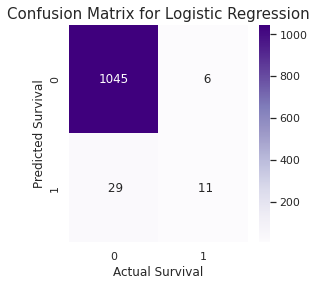

In [55]:
y_hat_test = logmodel.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test)
#visualize confusion matrix 
sns.set(rc = {'figure.figsize':(4,4)})

sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Purples")

plt.title('Confusion Matrix for Logistic Regression', y=1.05, size=15)
plt.ylabel('Predicted Survival')
plt.xlabel('Actual Survival')
acc_log_reg = round(accuracy_score(y_hat_test,y_test)*100,2)
print('The accuracy of the Logistic Regression is',acc_log_reg)
print("Precision :", round((precision_score(y_test, y_hat_test))*100,2))
print("Recall  :",round((recall_score(y_test, y_hat_test))*100,2))
print("F1 Score :",round((f1_score(y_test, y_hat_test))*100,2))

Validate the model with unseen test set

In [51]:
# model validation with test data
test_df_model.shape
test_log_reg_pred= logmodel.predict(test_df_model)
print(test_log_reg_pred)

(1364, 12)

[0 0 0 ... 0 0 0]


<Figure size 1008x504 with 0 Axes>

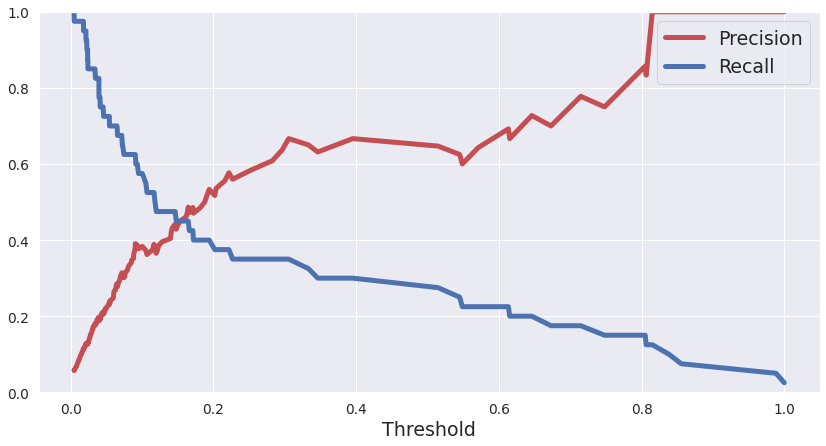

In [52]:

# getting the probabilities of our predictions

y_scores = logmodel.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Logistic Regression ROC AUC : 0.9235727878211227


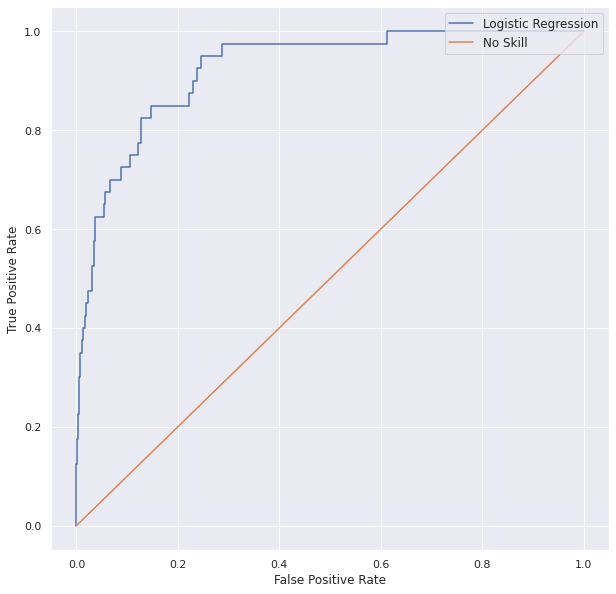

In [56]:
lr_auc = roc_auc_score(y_test,y_scores)
ns_prob = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test,ns_prob)

lr_fpr, lr_tpr ,_ = roc_curve(y_test,y_scores )
ns_fpr, ns_tpr ,_ = roc_curve(y_test,ns_prob )

plt.figure(figsize=(10, 10))
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression')
plt.plot(ns_fpr, ns_tpr, label = 'No Skill')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="upper right", fontsize=12)

print("\nLogistic Regression ROC AUC :",lr_auc)

In [57]:
scoring = {'Accuracy': 'accuracy', 'Log_loss': 'neg_log_loss', 'AUC': 'roc_auc','Precision': 'precision', 'Recall': 'recall','F1 Score':'f1'}

min_max_scaler = preprocessing.MinMaxScaler()
X_1 = min_max_scaler.fit_transform(X)
#y_1 = min_max_scaler.fit_transform(y)


X_2 = min_max_scaler.transform(X_1)
results = cross_validate(logmodel, X, y, cv=5, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(logmodel.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

K-fold cross-validation results:
LogisticRegression average Accuracy: 0.968 (+/-0.002)
LogisticRegression average Log_loss: 0.100 (+/-0.010)
LogisticRegression average AUC: 0.921 (+/-0.024)
LogisticRegression average Precision: 0.536 (+/-0.076)
LogisticRegression average Recall: 0.190 (+/-0.047)
LogisticRegression average F1 Score: 0.276 (+/-0.049)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Naive Bayes

In [58]:
#fit the model on training dataset
#Fitting the model on the train dataset 
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)#.predict(X_test)

Text(0.5, 1.05, 'Confusion Matrix for Naive Bayes Regression')

Text(30.5, 0.5, 'Predicted Survival')

Text(0.5, 12.5, 'Actual Survival')

The accuracy of the Naive Bayes Regression is 95.88
Precision : 43.59
Recall  : 42.5
F1 Score : 43.04


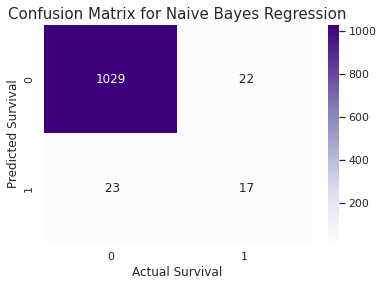

In [111]:
y_hat_test = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for Naive Bayes Regression', y=1.05, size=15)
plt.ylabel('Predicted Survival')
plt.xlabel('Actual Survival')
acc_log_reg = round(accuracy_score(y_hat_test,y_test)*100,2)
print('The accuracy of the Naive Bayes Regression is',acc_log_reg)
print("Precision :", round((precision_score(y_test, y_hat_test))*100,2))
print("Recall  :",round((recall_score(y_test, y_hat_test))*100,2))
print("F1 Score :",round((f1_score(y_test, y_hat_test))*100,2))

Validate the model with unseen test set

In [60]:
# model validation with test data
test_df_model.shape
test_log_gnb_pred= gnb.predict(test_df_model)
print(test_log_gnb_pred)

(1364, 12)

[0 0 1 ... 0 0 0]


<Figure size 1008x504 with 0 Axes>

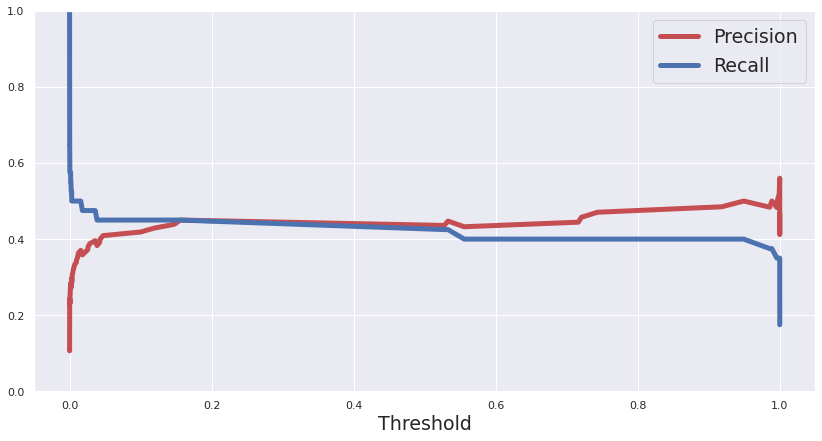

In [61]:

# getting the probabilities of our predictions

y_scores = gnb.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Naive Bayes ROC AUC : 0.9220266412940057


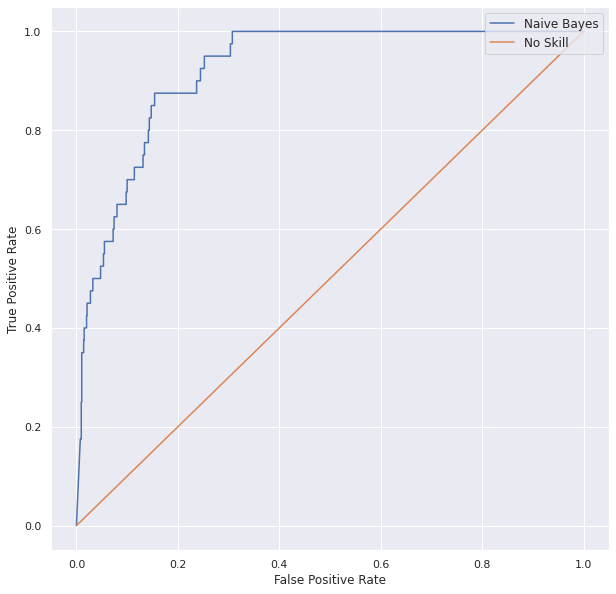

In [62]:
lr_auc = roc_auc_score(y_test,y_scores)
ns_prob = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test,ns_prob)

lr_fpr, lr_tpr ,_ = roc_curve(y_test,y_scores )
ns_fpr, ns_tpr ,_ = roc_curve(y_test,ns_prob )

plt.figure(figsize=(10, 10))
plt.plot(lr_fpr, lr_tpr, label = 'Naive Bayes')
plt.plot(ns_fpr, ns_tpr, label = 'No Skill')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="upper right", fontsize=12)

print("\nNaive Bayes ROC AUC :",lr_auc)

In [63]:
scoring = {'Accuracy': 'accuracy', 'Log_loss': 'neg_log_loss', 'AUC': 'roc_auc','Precision': 'precision', 'Recall': 'recall','F1 Score':'f1'}

min_max_scaler = preprocessing.MinMaxScaler()
X_1 = min_max_scaler.fit_transform(X)
#y_1 = min_max_scaler.fit_transform(y)


X_2 = min_max_scaler.transform(X_1)
results = cross_validate(gnb, X, y, cv=5, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(gnb.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
GaussianNB average Accuracy: 0.956 (+/-0.003)
GaussianNB average Log_loss: 0.514 (+/-0.083)
GaussianNB average AUC: 0.919 (+/-0.021)
GaussianNB average Precision: 0.360 (+/-0.033)
GaussianNB average Recall: 0.430 (+/-0.088)
GaussianNB average F1 Score: 0.389 (+/-0.053)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


## SVM

In [152]:
#fit the model on training dataset
#Fitting the model on the train dataset 
svm = SVC(probability=True, kernel='linear', C=1, gamma=1,  max_iter= 6)
#model = SVC(kernel='linear', c=1, gamma=1)
y_pred = svm.fit(X_train, y_train)#.predict(X_test)

Text(0.5, 1.05, 'Confusion Matrix for SVM Regression')

Text(30.5, 0.5, 'Predicted Survival')

Text(0.5, 12.5, 'Actual Survival')


The accuracy of the SVM Regression is 97.07
Precision : 83.33
Recall  : 25.0
F1 Score : 38.46


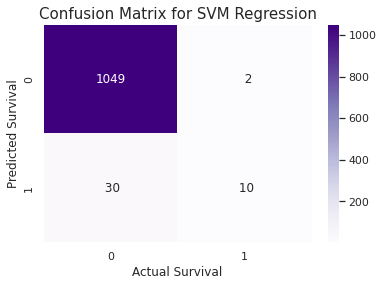

In [153]:
y_hat_test = svm.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for SVM Regression', y=1.05, size=15)
plt.ylabel('Predicted Survival')
plt.xlabel('Actual Survival')
acc_log_reg = round(accuracy_score(y_hat_test,y_test)*100,2)
print('\nThe accuracy of the SVM Regression is',acc_log_reg)
print("Precision :", round((precision_score(y_test, y_hat_test))*100,2))
print("Recall  :",round((recall_score(y_test, y_hat_test))*100,2))
print("F1 Score :",round((f1_score(y_test, y_hat_test))*100,2))

In [154]:
# model validation with test data
test_df_model.shape
test_log_svm_pred= svm.predict(test_df_model)
print(test_log_svm_pred)

(1364, 12)

[0 0 1 ... 0 0 0]


<Figure size 1008x504 with 0 Axes>

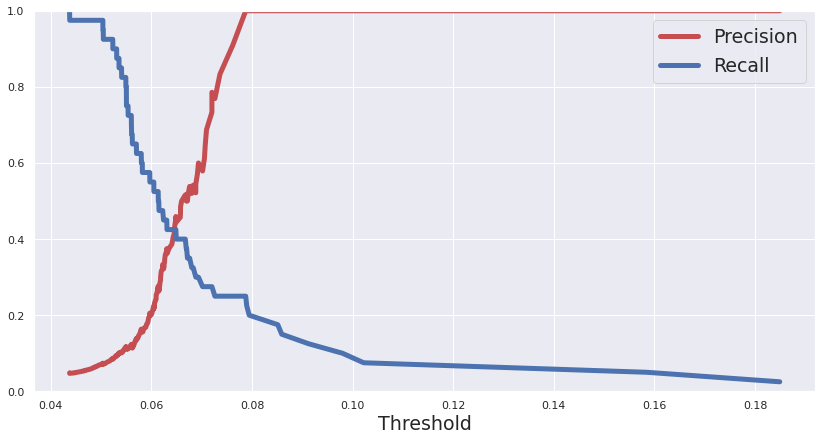

In [156]:

# getting the probabilities of our predictions

y_scores = svm.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])
    #plt.xlim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

\SVM ROC AUC : 0.8686964795432921


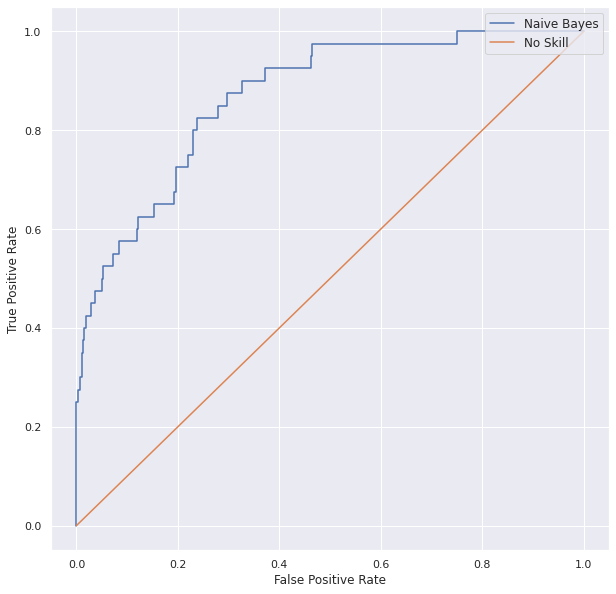

In [157]:
lr_auc = roc_auc_score(y_test,y_scores)
ns_prob = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test,ns_prob)

lr_fpr, lr_tpr ,_ = roc_curve(y_test,y_scores )
ns_fpr, ns_tpr ,_ = roc_curve(y_test,ns_prob )

plt.figure(figsize=(10, 10))
plt.plot(lr_fpr, lr_tpr, label = 'Naive Bayes')
plt.plot(ns_fpr, ns_tpr, label = 'No Skill')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="upper right", fontsize=12)

print("\SVM ROC AUC :",lr_auc)

In [162]:
scoring = {'Accuracy': 'accuracy', 'Log_loss': 'neg_log_loss', 'AUC': 'roc_auc',
           'Precision': 'precision', 'Recall': 'recall','F1 Score':'f1'}

min_max_scaler = preprocessing.MinMaxScaler()
X_1 = min_max_scaler.fit_transform(X)
#y_1 = min_max_scaler.fit_transform(y)


X_2 = min_max_scaler.transform(X_1)
results = cross_validate(svm, X, y, cv=40, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(svm.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], 
                                                                  -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
SVC average Accuracy: 0.425 (+/-0.169)
SVC average Log_loss: 0.463 (+/-0.748)
SVC average AUC: 0.347 (+/-0.176)
SVC average Precision: 0.027 (+/-0.033)
SVC average Recall: 0.384 (+/-0.240)
SVC average F1 Score: 0.048 (+/-0.052)


#Conclusion


 - 



#References:

 - https://scikit-learn.org/stable/modules/svm.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
 


